## Imports

In [24]:
import os
import pandas as pd
import sqlite3
from snps import SNPs
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### GWAS

This csv contains the GWAS data from Demontis et al., 2018.

In [12]:
gwas = pd.read_csv("db/adhd_jul2017", sep='\t')

In [20]:
# look at 1000 rsids with smallest p-value
gwas_small = gwas.sort_values("P")[:1000]

In [21]:
gwas_small.head(10)

,CHR,SNP,BP,A1,A2,INFO,OR,SE,P
109899,1,rs11420276,44184192,G,GT,0.982,1.11316,0.0146,2.143000e-13
109884,1,rs112984125,44173423,A,G,0.984,0.89942,0.0146,3.581000e-13
109894,1,rs17531412,44182244,A,G,0.990,1.11138,0.0145,3.612000e-13
109908,1,rs12410155,44188465,A,C,0.990,1.11138,0.0145,3.626000e-13
109897,1,rs112361411,44183923,T,C,0.990,0.89987,0.0145,3.722000e-13
109911,1,rs58097850,44189311,C,CT,0.990,1.11127,0.0145,3.826000e-13
109909,1,rs12410444,44188719,A,G,0.990,1.11127,0.0145,3.850000e-13
109924,1,rs11275853,44196194,GTTTCTGATTTCT+1,G,0.986,1.11104,0.0145,4.539000e-13
109907,1,rs11810109,44186812,A,T,0.989,1.10982,0.0145,7.140000e-13
109871,1,rs2270972,44158129,C,G,0.990,1.10893,0.0145,1.043000e-12


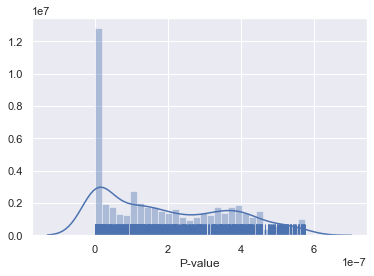

In [30]:
sns.distplot(gwas_small.P, rug=True, bins=30, axlabel="P-value");

### OpenCravat results

Restricted to ADHD-relevant genes.

In [7]:
dfs = {}
for i in os.listdir("ADHD_analysis"):
    if i in [".DS_store", ".ipynb_checkpoints"]:
        continue
    try:
        s = SNPs(f"ADHD_analysis/{i}")
    except UnicodeDecodeError:
        continue
    dfs[i] = s.snps


In [8]:
FILE = "db/ADHD_variant_genes.tsv"
df = pd.read_csv(FILE, sep='\t')
df.head()

,Chrom,Position,Ref_Base,Alt_Base,Note,Coding,Hugo,Sequence_Ontology,Protein_Change,Samples,Chrom.1,Position.1,Disease_Names,Phenotype,Global_AF,Chemical,Zygosity
0,chr1,43708410,G,A,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr1,43946668,NaN,NaN,0.435,NaN,het;hom;het;het
1,chr1,43712399,T,G,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2,chr1,43950657,NaN,NaN,0.784,NaN,hom;het;het
2,chr1,43729682,G,C,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr1,43967940,NaN,NaN,NaN,NaN,hom;hom;het;het
3,chr1,43734985,C,A,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr1,43973243,NaN,NaN,NaN,NaN,het;het;het;het
4,chr1,43734985,C,G,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr1,43973243,NaN,NaN,NaN,NaN,het;het;het;het


In [9]:
df.Hugo.unique()

array(['ST3GAL3', 'SPAG16', 'DRD5', 'PCDH7', 'FOXP2', 'DBH', 'SORCS3',
       'DRD4', 'DUSP6', 'SEMA6D', 'MAOA'], dtype=object)

In [81]:
len(df.Hugo.unique())

11

## Variants

In [62]:
bigdf = pd.concat(dfs.values(), keys=dfs.keys())
rsids = """rs11420276
rs1222063
rs9677504
rs4858241
rs28411770
rs4916723
rs5886709
rs74760947
rs11591402
rs1427829
rs281324
rs212178""".split("\n")
keys = list(dfs.keys())
bigdf = bigdf.reset_index().rename(columns={"level_0": "filename"})

In [68]:
bigdf.sample(10)

,filename,rsid,chrom,pos,genotype
4722069,60.23andme.txt,rs4861067,4,40518211,GG
994742,561.23andme.txt,rs4908501,1,8554471,TT
894637,678.23andme.txt,rs892051,19,22689387,CC
7036088,865.23andme.txt,rs1375977,11,26859639,AA
4982101,60.23andme.txt,rs1154961,8,123154424,AA
2202773,genome_Susan_Loftus_v3_Full_20200212185613 2.txt,rs961295,4,113933776,GG
1355761,561.23andme.txt,rs9362469,6,88901994,CC
4198972,genome_Alexander_Loftus_v4_Full_20200127140315...,rs12351772,9,83000227,CC
1408237,561.23andme.txt,rs10254080,7,74137214,CC
1684139,561.23andme.txt,rs9567982,13,48605441,AG


In [69]:
bigdf.filename.unique()

array(['678.23andme.txt', '561.23andme.txt',
       'genome_Susan_Loftus_v3_Full_20200212185613 2.txt',
       '8.23andme.txt',
       'genome_Alexander_Loftus_v4_Full_20200127140315.txt',
       '60.23andme.txt', 'genome_Emma_Loftus_v3_Full_20200324162732.txt',
       '865.23andme.txt', '616.23andme.txt'], dtype=object)

In [36]:
from collections import defaultdict

#### Count number of rsids present in my 23andme samples

In [37]:
c = defaultdict(int)
for j in keys:
    for i in rsids:
        try:
            c[i] += 1
            print(bigdf.loc[j, i])
        except KeyError:
            c[i] = 0
            continue

chrom              5
pos         87854395
genotype          CC
Name: (678.23andme.txt, rs4916723), dtype: object
chrom              5
pos         87854395
genotype          CC
Name: (561.23andme.txt, rs4916723), dtype: object
chrom              5
pos         87854395
genotype          CC
Name: (genome_Susan_Loftus_v3_Full_20200212185613 2.txt, rs4916723), dtype: object
chrom              5
pos         87890151
genotype          AC
Name: (8.23andme.txt, rs4916723), dtype: object
chrom              5
pos         87890151
genotype          AA
Name: (60.23andme.txt, rs4916723), dtype: object
chrom              5
pos         87854395
genotype          AC
Name: (genome_Emma_Loftus_v3_Full_20200324162732.txt, rs4916723), dtype: object
chrom              5
pos         87890151
genotype          AA
Name: (865.23andme.txt, rs4916723), dtype: object
chrom              5
pos         87890151
genotype          AC
Name: (616.23andme.txt, rs4916723), dtype: object


### 23andme does not appear to record most of these on its GWAS

In [38]:
c

defaultdict(int,
            {'rs11420276': 0,
             'rs1222063': 0,
             'rs9677504': 0,
             'rs4858241': 0,
             'rs28411770': 0,
             'rs4916723': 4,
             'rs5886709': 0,
             'rs74760947': 0,
             'rs11591402': 0,
             'rs1427829': 0,
             'rs281324': 0,
             'rs212178': 0})

## Genes

In [78]:
genes = """ST3GAL3
SPAG16
PCDH7
LINC00461
FOXP2
LINC01288
SORCS3
DUSP6
SEMA6D
DRD4
DAT1
DBH
MAOA
DRD5""".split("\n")


In [80]:
df.head()

,Chrom,Position,Ref_Base,Alt_Base,Note,Coding,Hugo,Sequence_Ontology,Protein_Change,Samples,Chrom.1,Position.1,Disease_Names,Phenotype,Global_AF,Chemical,Zygosity
0,chr1,43708410,G,A,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr1,43946668,NaN,NaN,0.435,NaN,het;hom;het;het
1,chr1,43712399,T,G,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2,chr1,43950657,NaN,NaN,0.784,NaN,hom;het;het
2,chr1,43729682,G,C,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr1,43967940,NaN,NaN,NaN,NaN,hom;hom;het;het
3,chr1,43734985,C,A,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr1,43973243,NaN,NaN,NaN,NaN,het;het;het;het
4,chr1,43734985,C,G,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr1,43973243,NaN,NaN,NaN,NaN,het;het;het;het


In [72]:
gdfs = {g: df[df["Hugo"] == g] for g in genes}
gdfs.keys()

dict_keys(['ST3GAL3', 'SPAG16', 'PCDH7', 'LINC00461', 'FOXP2', 'LINC01288', 'SORCS3', 'DUSP6', 'SEMA6D', 'DRD4', 'DAT1', 'DBH', 'MAOA', 'DRD5'])

### variants in coding regions

In [73]:
coding = df[df.Coding.notna()]

In [74]:
len(coding)

58

In [75]:
coding.head()

,Chrom,Position,Ref_Base,Alt_Base,Note,Coding,Hugo,Sequence_Ontology,Protein_Change,Samples,Chrom.1,Position.1,Disease_Names,Phenotype,Global_AF,Chemical,Zygosity
48,chr1,43824858,T,A,NaN,Yes,ST3GAL3,synonymous,T128T,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr1,44063117,NaN,NaN,NaN,NaN,het;hom;het;het
49,chr1,43824858,T,G,NaN,Yes,ST3GAL3,missense,T128A,60.23andme.27;616.23andme.288;8.23andme.2,chr1,44063117,NaN,NaN,NaN,NaN,het;het;het
162,chr2,213862497,G,A,NaN,Yes,SPAG16,synonymous,Q361Q,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr2,214435466,NaN,NaN,NaN,NaN,hom;hom;het;hom
172,chr2,213930019,T,C,NaN,Yes,SPAG16,missense,K425T,60.23andme.27;8.23andme.2;865.23andme.427,chr2,214502988,NaN,NaN,NaN,NaN,hom;het;hom
323,chr4,9782741,C,G,NaN,Yes,DRD5,synonymous,V238V,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr4,9393463,NaN,NaN,NaN,NaN,hom;hom;hom;hom


#### Number Coding variants in our samples, grouped by gene

In [76]:
count_df = coding.groupby("Hugo").count()
count_df.sort_values(by="Coding", ascending=False).Coding

Hugo
DBH        13
MAOA       11
DRD4        8
DUSP6       6
SEMA6D      6
SPAG16      4
SORCS3      3
DRD5        2
PCDH7       2
ST3GAL3     2
FOXP2       1
Name: Coding, dtype: int64

## Run 2: BioGRID, FATHMM, GRASP, ExAC, CNV, new genes

In [91]:
NEWRUN = "db/ADHD_run_2.tsv"
df = pd.read_csv(NEWRUN, sep='\t', header=1)
df.head()

,Chrom,Position,Ref_Base,Alt_Base,Note,Coding,Hugo,Sequence_Ontology,Protein_Change,Samples,Chrom.1,Position.1,Interactors,pLI,Converted_Rank Score,Phenotype,Search_Link,Zygosity
0,chr1,43719257,G,A,NaN,NaN,ST3GAL3,intron,NaN,561.23andme.txt;genome_Emma_Loftus_v3_Full_202...,chr1,43957515,ACTG1;HNRNPL;RPL8;SCAMP2;ZBTB5,0.574,NaN,NaN,http://www.ncbi.nlm.nih.gov/pubmed?term=ST3GAL...,hom;het;het
1,chr1,43722221,A,G,NaN,NaN,ST3GAL3,intron,NaN,561.23andme.txt;genome_Alexander_Loftus_v4_Ful...,chr1,43960479,ACTG1;HNRNPL;RPL8;SCAMP2;ZBTB5,0.574,NaN,NaN,http://www.ncbi.nlm.nih.gov/pubmed?term=ST3GAL...,hom;het;het;hom
2,chr1,43736506,G,T,NaN,NaN,ST3GAL3,intron,NaN,561.23andme.txt;genome_Alexander_Loftus_v4_Ful...,chr1,43974764,ACTG1;HNRNPL;RPL8;SCAMP2;ZBTB5,0.574,NaN,NaN,http://www.ncbi.nlm.nih.gov/pubmed?term=ST3GAL...,hom;het;hom;hom
3,chr1,43740579,T,C,NaN,NaN,ST3GAL3,intron,NaN,561.23andme.txt;genome_Alexander_Loftus_v4_Ful...,chr1,43978837,ACTG1;HNRNPL;RPL8;SCAMP2;ZBTB5,0.574,NaN,NaN,http://www.ncbi.nlm.nih.gov/pubmed?term=ST3GAL...,hom;het;het;hom
4,chr1,43743007,C,T,NaN,NaN,ST3GAL3,intron,NaN,561.23andme.txt;genome_Emma_Loftus_v3_Full_202...,chr1,43981265,ACTG1;HNRNPL;RPL8;SCAMP2;ZBTB5,0.574,NaN,NaN,http://www.ncbi.nlm.nih.gov/pubmed?term=ST3GAL...,hom;het;het


## Grouped by genes, look at interactors.

In [97]:
gb = df.groupby("Hugo").Interactors

In [126]:
?pd.melt

Signature:
pd.melt(
    frame,
    id_vars=None,
    value_vars=None,
    var_name=None,
    value_name='value',
    col_level=None,
)
Docstring:
Unpivot a DataFrame from wide format to long format, optionally
leaving identifier variables set.

This function is useful to massage a DataFrame into a format where one
or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to
the row axis, leaving just two non-identifier columns, 'variable' and
'value'.

Parameters
----------
frame : DataFrame
id_vars : tuple, list, or ndarray, optional
    Column(s) to use as identifier variables.
value_vars : tuple, list, or ndarray, optional
    Column(s) to unpivot. If not specified, uses all columns that
    are not set as `id_vars`.
var_name : scalar
    Name to use for the 'variable' column. If None it uses
    ``frame.columns.name`` or 'variable'.
value_name : scalar, default 'value'
    Name to use for the 'value'

#### Gene interactions as columns

In [137]:
interactions_df = gb.describe().sort_values("count", ascending=False)["top"].str.split(";", expand=True)
interactions_df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Hugo,,,,,,,,,,,,,,,,,,,,,
SPAG16,ADCY6,BAG3,SETD5,TCHP,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
SORCS3,RBM33,SF1,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
SEMA6D,TPM2,TRIM25,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
FOXP2,AES,CCNC,CSNK1E,CTBP1,CTBP2,DSG4,DUSP14,EFHD1,FAM124A,FOXP1,...,None,None,None,None,None,None,None,None,None,None
ST3GAL3,ACTG1,HNRNPL,RPL8,SCAMP2,ZBTB5,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


#### Table of Interactions

In [140]:
interactions_df.T

Hugo,SPAG16,SORCS3,SEMA6D,FOXP2,ST3GAL3,MEF2C,MAOA,DBH,DRD4,DUSP6,PCDH7,DRD5
0,ADCY6,RBM33,TPM2,AES,ACTG1,ASCL1,COQ9,CLN3,ARRB1,AATK,ABCG2,GABRG2
1,BAG3,SF1,TRIM25,CCNC,HNRNPL,COPS5,HNRNPL,CLN5,ARRB2,AP3S1,C2orf48,GNA12
2,SETD5,None,None,CSNK1E,RPL8,EP300,MAOB,NTRK1,CLIC6,APOOL,CAPZA1,GNA13
3,TCHP,None,None,CTBP1,SCAMP2,EPAS1,MIEF1,PPT1,CUL3,ARF5,CAPZA2,None
4,None,None,None,CTBP2,ZBTB5,HDAC4,NDRG1,None,GRB2,ARPC3,CEP350,None
5,None,None,None,DSG4,None,HDAC5,None,None,KCNJ3,AURKB,CMSS1,None
6,None,None,None,DUSP14,None,HDAC7,None,None,KCNJ5,C17orf62,CTDSPL,None
7,None,None,None,EFHD1,None,HDAC9,None,None,KCNJ9,C2orf47,CYBRD1,None
8,None,None,None,FAM124A,None,IFRD1,None,None,KLHL12,CAND1,DDX28,None
9,None,None,None,FOXP1,None,MAPK14,None,None,NCK1,CHP1,DDX39A,None


#### Number of interactions

In [138]:
interactions_df.notna().sum(axis=1).sort_values(ascending=False)

Hugo
DUSP6      60
PCDH7      38
MEF2C      28
FOXP2      28
DRD4       11
MAOA        5
ST3GAL3     5
DBH         4
SPAG16      4
DRD5        3
SEMA6D      2
SORCS3      2
dtype: int64

In [121]:
df.groupby("Hugo").describe()

Position                                                          \
           count          mean            std          min           25%   
Hugo                                                                       
DBH         59.0  1.336451e+08    7525.205461  133634717.0  1.336395e+08   
DRD4        23.0  6.389588e+05    2041.271194     636198.0  6.367125e+05   
DRD5         2.0  9.783054e+06     443.355952    9782741.0  9.782898e+06   
DUSP6       12.0  8.935049e+07    2144.078744   89347087.0  8.934936e+07   
FOXP2      225.0  1.144025e+08  179913.563654  114086746.0  1.142604e+08   
MAOA        69.0  4.370259e+07   32011.298036   43653054.0  4.366838e+07   
MEF2C       86.0  8.881536e+07   58065.661286   88719728.0  8.876931e+07   
PCDH7       11.0  3.072721e+07    4663.155243   30719010.0  3.072499e+07   
SEMA6D     455.0  4.748939e+07  160595.209434   47184935.0  4.737464e+07   
SORCS3     488.0  1.049846e+08  175304.751467  104642014.0  1.048432e+08   
SPAG16     570.0  2.139291e+08  342142.110399  213282521.0  2.136457e+08   
ST3GAL3    122.0  4.381168e+07   56931.538439   43708410.0  4.377632e+07   

                                                 Note       ...    pLI         \
                 50%           75%          max count mean  ...    75%    max   
Hugo                                                        ...                 
DBH      133643961.0  1.336514e+08  133660555.0   0.0  NaN  ...  0.000  0.000   
DRD4        640043.0  6.403430e+05     641801.0   0.0  NaN  ...  0.000  0.000   
DRD5       9783054.5  9.783211e+06    9783368.0   0.0  NaN  ...  0.000  0.000   
DUSP6     89350996.0  8.935121e+07   89355119.0   0.0  NaN  ...  0.911  0.911   
FOXP2    114429481.0  1.145660e+08  114693988.0   0.0  NaN  ...  0.996  0.996   
MAOA      43701026.0  4.373277e+07   43748820.0   0.0  NaN  ...  0.993  0.993   
MEF2C     88818659.0  8.886419e+07   88905369.0   0.0  NaN  ...  0.004  0.004   
PCDH7     30726662.0  3.072877e+07   30734679.0   0.0  NaN  ...    NaN    NaN   
SEMA6D    47471775.0  4.761265e+07   47775790.0   0.0  NaN  ...  0.999  0.999   
SORCS3   105020876.0  1.051380e+08  105266809.0   0.0  NaN  ...  0.325  0.325   
SPAG16   214016872.0  2.142126e+08  214407122.0   0.0  NaN  ...  0.000  0.000   
ST3GAL3   43806650.0  4.384337e+07   43930543.0   0.0  NaN  ...  0.574  0.574   

        Converted_Rank Score                                            \
                       count      mean       std    min     25%    50%   
Hugo                                                                     
DBH                      2.0  0.388000  0.149907  0.282  0.3350  0.388   
DRD4                     5.0  0.679200  0.007294  0.670  0.6760  0.680   
DRD5                     1.0  0.628000       NaN  0.628  0.6280  0.628   
DUSP6                    3.0  0.269333  0.210514  0.027  0.2005  0.374   
FOXP2                    0.0       NaN       NaN    NaN     NaN    NaN   
MAOA                     0.0       NaN       NaN    NaN     NaN    NaN   
MEF2C                    0.0       NaN       NaN    NaN     NaN    NaN   
PCDH7                    0.0       NaN       NaN    NaN     NaN    NaN   
SEMA6D                   0.0       NaN       NaN    NaN     NaN    NaN   
SORCS3                   1.0  0.154000       NaN  0.154  0.1540  0.154   
SPAG16                   2.0  0.681000  0.147078  0.577  0.6290  0.681   
ST3GAL3                  1.0  0.505000       NaN  0.505  0.5050  0.505   

                        
            75%    max  
Hugo                    
DBH      0.4410  0.494  
DRD4     0.6800  0.690  
DRD5     0.6280  0.628  
DUSP6    0.3905  0.407  
FOXP2       NaN    NaN  
MAOA        NaN    NaN  
MEF2C       NaN    NaN  
PCDH7       NaN    NaN  
SEMA6D      NaN    NaN  
SORCS3   0.1540  0.154  
SPAG16   0.7330  0.785  
ST3GAL3  0.5050  0.505  

[12 rows x 40 columns]